In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [39]:
data = pd.read_csv('Practice/data/advertising.csv')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [50]:
xTrain = data.values[:,:-1]
yTrain = data.values[:,-1]

In [51]:
def predict(x,w,b):
    return np.dot(x,w)+b

In [52]:
def gradientDescent(x,y,learningRate,iterations):
    m,n = x.shape
    w,b = np.zeros(n),0
    costList = np.array([])
    for i in range(iterations):
        cost = (1/(2*m))*np.sum(np.square(predict(x,w,b)-y))
        costList = np.append(costList,cost)
        dw = (1/m)*np.dot(x.T,predict(x,w,b)-y)
        db = (1/m)*(predict(x,w,b)-y)
        w = w - learningRate*dw
        b = b - learningRate*db
        if(i%(iterations/100)==0):
            print(f'Iteration : {i}\tCost : {cost}')
    return w,b,costList

In [53]:
w,b,costList = gradientDescent(xTrain,yTrain,learningRate=1e-5,iterations=10000)

Iteration : 0	Cost : 128.355975
Iteration : 100	Cost : 4.51505496415097
Iteration : 200	Cost : 3.7209040061776135
Iteration : 300	Cost : 3.4079226367413002
Iteration : 400	Cost : 3.2404553042953665
Iteration : 500	Cost : 3.135281804969965
Iteration : 600	Cost : 3.0651830606970494
Iteration : 700	Cost : 3.0175634711164263
Iteration : 800	Cost : 2.98502472086985
Iteration : 900	Cost : 2.9627496501529755
Iteration : 1000	Cost : 2.9474901111088387
Iteration : 1100	Cost : 2.9370320876387472
Iteration : 1200	Cost : 2.9298615390973084
Iteration : 1300	Cost : 2.924942096337352
Iteration : 1400	Cost : 2.9215641552329137
Iteration : 1500	Cost : 2.9192418069715473
Iteration : 1600	Cost : 2.917642312033375
Iteration : 1700	Cost : 2.9165378161088307
Iteration : 1800	Cost : 2.915772288133013
Iteration : 1900	Cost : 2.915238880404503
Iteration : 2000	Cost : 2.9148644252272904
Iteration : 2100	Cost : 2.9145988184626934
Iteration : 2200	Cost : 2.9144077495489116
Iteration : 2300	Cost : 2.91426772312831

Text(0, 0.5, 'Sales')

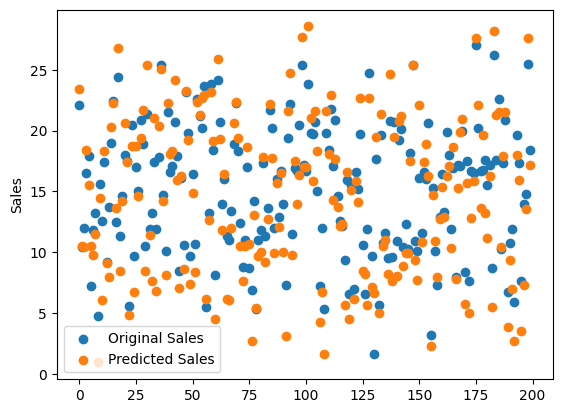

In [57]:
m = range(yTrain.size)
plt.scatter(m,yTrain,label='Original Sales')
plt.scatter(m,predict(xTrain,w,b),label='Predicted Sales')
plt.legend()
plt.ylabel('Sales')